# Library Import

In [19]:
# Importing libraries
import numpy as np    # linear algebra
import pandas as pd   # data reading and analysis
import matplotlib.pyplot as plt     # data visualization
import seaborn as sns     # data visualization (here will be used for heatmap)

# Read Data 

In [20]:
# Selection of countries
allsel=["Afghanistan", "Albania", "China", "Australia", "France", "Belgium", "India", "Italy", "Canada"]
# Selection of indicators from World bank data
indic=["Electric power consumption (kWh per capita)", "Renewable energy consumption (% of total final energy consumption)"]

In [21]:
print(*allsel,sep=", ")

Afghanistan, Albania, China, Australia, France, Belgium, India, Italy, Canada


In [22]:
def transform(er):    # function for transforming data
    ercols=er.columns    # get data columns
    eridx=er.index      # get data indices
    erarr=np.array(er.values,int)    # convert data to integer values
    er=pd.DataFrame(erarr,columns=ercols,index=eridx)    # finalizing data frame to be used for correlation
    return er    # return data

In [23]:
def read_data(erdt):     # fuction to read data
    erd=pd.read_csv(erdt,engine='python',skiprows=3)     # read data using read_csv method
    erd=erd.fillna(erd.mean())    # data cleaning by mean() statistics
    years=erd.columns.tolist()[4:-1]    # take year columns
    erd=erd[(erd['Indicator Name']==indic[0])|((erd['Indicator Name']==indic[1]))]    # filter wb by indicator
    fltr=erd['Country Name'].isin(allsel)    # check selecetd countries in data and filter data
    erd=erd[fltr]     # subset data by that filter
    cntr=erd['Country Name'].tolist()     # get Country Name into list
    indx=erd['Indicator Name'].tolist()     # get Indicator Name into list
    nw=[]
    for i in range(len(indx)):
        nw.append(cntr[i])    # craeting new column by conbining country and indicator
    erd.insert(4,"Countries",nw)    # insert Countries into data
    ernw=erd.T.iloc[4:][:-1]
    drops=['Unnamed: 65','Country Code','Indicator Code','Countries']
    # drop unnecessary features
    erd=erd.reset_index(drop=True).drop(drops,axis=1)
    ernw.columns=ernw.iloc[0]    # assign column names
    ernw=ernw.iloc[1:]      # assign data (after 0th row)
    ernw['Year']=years    # assign year into data
    ernw=ernw.set_index("Year")    # se5 year feature to index
    return erd,ernw  

In [24]:
erd,erd1=read_data("Electrical_Renewable_World_Bank.csv")

In [25]:
erd=erd.drop('Indicator Name',axis=1)
erd.head()   # Data with Year Column

,Country Name,1960,1961,1962,1963,1964,1965,1966,1967,1968,...,2011,2012,2013,2014,2015,2016,2017,2018,2019,2020
0,Afghanistan,2.015940e+07,1.476890e+07,1.488896e+07,1.642074e+07,1.688664e+07,1.753013e+07,1.965494e+07,1.971973e+07,2.183690e+07,...,6.309450e+08,7.156517e+08,9.744211e+08,1.110238e+09,1.375829e+09,1.352424e+07,1.553889e+07,1.709443e+07,3.435867e+07,4.320922e+07
1,Afghanistan,2.015940e+07,1.476890e+07,1.488896e+07,1.642074e+07,1.688664e+07,1.753013e+07,1.965494e+07,1.971973e+07,2.183690e+07,...,1.155910e+01,1.440490e+01,1.710500e+01,2.077030e+01,2.027380e+01,2.474030e+01,2.508280e+01,2.142270e+01,3.435867e+07,4.320922e+07
2,Albania,2.015940e+07,1.476890e+07,1.488896e+07,1.642074e+07,1.688664e+07,1.753013e+07,1.965494e+07,1.971973e+07,2.183690e+07,...,2.205704e+03,2.118328e+03,2.533253e+03,2.309367e+03,1.375829e+09,1.352424e+07,1.553889e+07,1.709443e+07,3.435867e+07,4.320922e+07
3,Albania,2.015940e+07,1.476890e+07,1.488896e+07,1.642074e+07,1.688664e+07,1.753013e+07,1.965494e+07,1.971973e+07,2.183690e+07,...,3.596110e+01,4.004670e+01,4.128700e+01,3.869740e+01,3.862560e+01,3.958730e+01,3.721980e+01,3.826640e+01,3.435867e+07,4.320922e+07
4,Australia,1.825626e+03,1.947153e+03,2.012661e+03,2.211689e+03,2.417211e+03,2.625220e+03,2.765085e+03,2.969489e+03,3.102007e+03,...,1.062729e+04,1.040774e+04,1.022089e+04,1.007140e+04,1.375829e+09,1.352424e+07,1.553889e+07,1.709443e+07,3.435867e+07,4.320922e+07


In [26]:
erd1.head()   # Data with country column

Countries,Afghanistan,Afghanistan,Albania,Albania,Australia,Australia,Belgium,Belgium,Canada,Canada,China,China,France,France,India,India,Italy,Italy
Year,,,,,,,,,,,,,,,,,,
1960,20159401.163406,20159401.163406,20159401.163406,20159401.163406,1825.62565,20159401.163406,1576.338815,20159401.163406,5630.629813,20159401.163406,20159401.163406,20159401.163406,1462.709801,20159401.163406,20159401.163406,20159401.163406,975.025747,20159401.163406
1961,14768896.898304,14768896.898304,14768896.898304,14768896.898304,1947.152533,14768896.898304,1627.51357,14768896.898304,5605.111926,14768896.898304,14768896.898304,14768896.898304,1550.384939,14768896.898304,14768896.898304,14768896.898304,1046.415105,14768896.898304
1962,14888963.885678,14888963.885678,14888963.885678,14888963.885678,2012.660585,14888963.885678,1753.143892,14888963.885678,5791.12496,14888963.885678,14888963.885678,14888963.885678,1654.215638,14888963.885678,14888963.885678,14888963.885678,1143.605129,14888963.885678
1963,16420743.87221,16420743.87221,16420743.87221,16420743.87221,2211.689498,16420743.87221,1880.993824,16420743.87221,5966.04092,16420743.87221,16420743.87221,16420743.87221,1751.161074,16420743.87221,16420743.87221,16420743.87221,1266.350581,16420743.87221
1964,16886643.335033,16886643.335033,16886643.335033,16886643.335033,2417.211427,16886643.335033,2062.994976,16886643.335033,6468.926261,16886643.335033,16886643.335033,16886643.335033,1896.889911,16886643.335033,16886643.335033,16886643.335033,1353.314491,16886643.335033


In [27]:
erd.describe()    # shwo data statistics

,1960,1961,1962,1963,1964,1965,1966,1967,1968,1969,...,2011,2012,2013,2014,2015,2016,2017,2018,2019,2020
count,1.800000e+01,1.800000e+01,1.800000e+01,1.800000e+01,1.800000e+01,1.800000e+01,1.800000e+01,1.800000e+01,1.800000e+01,1.800000e+01,...,1.800000e+01,1.800000e+01,1.800000e+01,1.800000e+01,1.800000e+01,1.800000e+01,1.800000e+01,1.800000e+01,1.800000e+01,1.800000e+01
mean,1.456020e+07,1.066708e+07,1.075383e+07,1.186015e+07,1.219670e+07,1.266149e+07,1.419612e+07,1.424296e+07,1.577208e+07,1.664746e+07,...,3.505547e+07,3.976137e+07,5.413749e+07,6.168282e+07,6.879144e+08,6.762132e+06,7.769457e+06,8.547227e+06,3.435867e+07,4.320922e+07
std,9.290181e+06,6.805731e+06,6.861015e+06,7.566928e+06,7.781553e+06,8.078041e+06,9.057257e+06,9.087046e+06,1.006274e+07,1.062120e+07,...,1.487144e+08,1.686800e+08,2.296725e+08,2.616849e+08,7.078581e+08,6.958155e+06,7.994685e+06,8.795003e+06,1.533317e-08,7.666584e-09
min,9.750257e+02,1.046415e+03,1.143605e+03,1.266351e+03,1.353314e+03,1.446740e+03,1.573202e+03,1.693254e+03,1.823399e+03,1.934814e+03,...,6.630100e+00,7.759000e+00,8.092900e+00,9.124800e+00,9.315500e+00,9.206900e+00,9.638000e+00,9.645000e+00,3.435867e+07,4.320922e+07
25%,5.044073e+06,3.696428e+06,3.726584e+06,4.109660e+06,4.226513e+06,4.387714e+06,4.919253e+06,4.935655e+06,5.465248e+06,5.768615e+06,...,1.164533e+01,1.439425e+01,1.651587e+01,1.804127e+01,1.749632e+01,1.765240e+01,1.801610e+01,1.816140e+01,3.435867e+07,4.320922e+07
50%,2.015940e+07,1.476890e+07,1.488896e+07,1.642074e+07,1.688664e+07,1.753013e+07,1.965494e+07,1.971973e+07,2.183690e+07,2.304886e+07,...,3.687099e+02,3.816418e+02,4.027441e+02,4.216069e+02,6.879144e+08,6.762142e+06,7.769466e+06,8.547236e+06,3.435867e+07,4.320922e+07
75%,2.015940e+07,1.476890e+07,1.488896e+07,1.642074e+07,1.688664e+07,1.753013e+07,1.965494e+07,1.971973e+07,2.183690e+07,2.304886e+07,...,6.803435e+03,6.872003e+03,6.815679e+03,6.455559e+03,1.375829e+09,1.352424e+07,1.553889e+07,1.709443e+07,3.435867e+07,4.320922e+07
max,2.015940e+07,1.476890e+07,1.488896e+07,1.642074e+07,1.688664e+07,1.753013e+07,1.965494e+07,1.971973e+07,2.183690e+07,2.304886e+07,...,6.309450e+08,7.156517e+08,9.744211e+08,1.110238e+09,1.375829e+09,1.352424e+07,1.553889e+07,1.709443e+07,3.435867e+07,4.320922e+07


In [28]:
erd.info()    # show data information

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 18 entries, 0 to 17
Data columns (total 62 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   Country Name  18 non-null     object 
 1   1960          18 non-null     float64
 2   1961          18 non-null     float64
 3   1962          18 non-null     float64
 4   1963          18 non-null     float64
 5   1964          18 non-null     float64
 6   1965          18 non-null     float64
 7   1966          18 non-null     float64
 8   1967          18 non-null     float64
 9   1968          18 non-null     float64
 10  1969          18 non-null     float64
 11  1970          18 non-null     float64
 12  1971          18 non-null     float64
 13  1972          18 non-null     float64
 14  1973          18 non-null     float64
 15  1974          18 non-null     float64
 16  1975          18 non-null     float64
 17  1976          18 non-null     float64
 18  1977          18 non-null     fl

In [29]:
erd1.loc[:,erd1.columns.duplicated()].describe().T        # show data statistics 

,count,unique,top,freq
Countries,,,,
Afghanistan,61.0,61.0,1.476890e+07,1.0
Albania,61.0,61.0,1.476890e+07,1.0
Australia,61.0,61.0,1.476890e+07,1.0
Belgium,61.0,61.0,1.476890e+07,1.0
Canada,61.0,61.0,1.476890e+07,1.0
China,61.0,61.0,1.476890e+07,1.0
France,61.0,61.0,1.476890e+07,1.0
India,61.0,61.0,1.476890e+07,1.0
Italy,61.0,61.0,1.476890e+07,1.0


In [30]:
erd1.info()    # show data information

<class 'pandas.core.frame.DataFrame'>
Index: 61 entries, 1960 to 2020
Data columns (total 18 columns):
 #   Column       Non-Null Count  Dtype 
---  ------       --------------  ----- 
 0   Afghanistan  61 non-null     object
 1   Afghanistan  61 non-null     object
 2   Albania      61 non-null     object
 3   Albania      61 non-null     object
 4   Australia    61 non-null     object
 5   Australia    61 non-null     object
 6   Belgium      61 non-null     object
 7   Belgium      61 non-null     object
 8   Canada       61 non-null     object
 9   Canada       61 non-null     object
 10  China        61 non-null     object
 11  China        61 non-null     object
 12  France       61 non-null     object
 13  France       61 non-null     object
 14  India        61 non-null     object
 15  India        61 non-null     object
 16  Italy        61 non-null     object
 17  Italy        61 non-null     object
dtypes: object(18)
memory usage: 9.1+ KB


# Data Analysis

In [31]:
erd1.loc[:,erd1.columns.duplicated()].copy()

Countries,Afghanistan,Albania,Australia,Belgium,Canada,China,France,India,Italy
Year,,,,,,,,,
1960,20159401.163406,20159401.163406,20159401.163406,20159401.163406,20159401.163406,20159401.163406,20159401.163406,20159401.163406,20159401.163406
1961,14768896.898304,14768896.898304,14768896.898304,14768896.898304,14768896.898304,14768896.898304,14768896.898304,14768896.898304,14768896.898304
1962,14888963.885678,14888963.885678,14888963.885678,14888963.885678,14888963.885678,14888963.885678,14888963.885678,14888963.885678,14888963.885678
1963,16420743.87221,16420743.87221,16420743.87221,16420743.87221,16420743.87221,16420743.87221,16420743.87221,16420743.87221,16420743.87221
1964,16886643.335033,16886643.335033,16886643.335033,16886643.335033,16886643.335033,16886643.335033,16886643.335033,16886643.335033,16886643.335033
...,...,...,...,...,...,...,...,...,...
2016,24.740299,39.587299,9.4198,9.2069,22.333,12.5897,14.4117,33.562901,16.092199
2017,25.0828,37.219799,9.6861,9.638,22.769899,12.8636,14.1386,32.212101,16.431499
2018,21.422701,38.266399,9.645,10.6627,22.182899,13.1238,15.2526,31.689199,17.074301


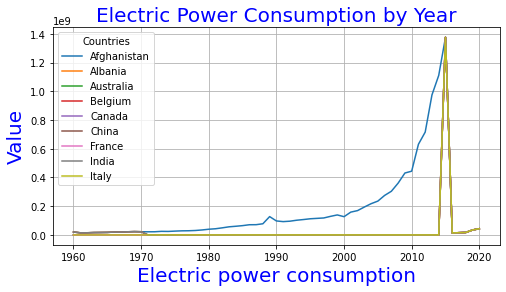

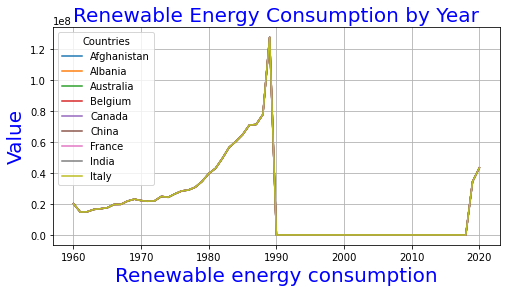

In [32]:
def tsplot(erd,ft1,ft2):    # function for time series plot
    erdx = erd.loc[:,~erd.columns.duplicated()].copy()     # subset data by Electric power consumption
    erdx.plot(kind='line',figsize=(8,4))    # plot data from dataframe
    plt.title("Electric Power Consumption by Year",fontsize=20,color="b")     # title of graph  
    plt.xlabel("{}".format(ft1),fontsize=20,color="b")   # x-label of graph
    plt.ylabel("Value",fontsize=20,color="b")    # y-label of graph
    plt.grid()      # grid of graph
    plt.show()      # show the graph
    
    erdx = erd.loc[:,erd.columns.duplicated()].copy()       # subset data by Renewable energy consumption
    erdx.plot(kind='line',figsize=(8,4))    # plot data from dataframe
    plt.title("Renewable Energy Consumption by Year",fontsize=20,color="b")     # title of graph   # x-label of graph
    plt.xlabel("{}".format(ft2),fontsize=20,color="b")   # x-label of graph
    plt.ylabel("Value",fontsize=20,color="b")    # y-label of graph
    plt.grid()      # grid of graph
    plt.show()      # show the graph
tsplot(erd1,"Electric power consumption","Renewable energy consumption")

In [33]:
v1mx,v2mx=[],[]
for i in range(len(allsel)):
    temperd=erd[erd['Country Name']==allsel[i]]    # prepare data by country
    v1mx.append(round(temperd.iloc[0,1:].max(),2))    # calculate maximum value for Electric power consumption
    v2mx.append(round(temperd.iloc[1,1:].max(),2))    # calculate maximum value for Renewable energy consumption
print("----------------------------------------------------------------")
print("           Electric power consumption Statistics (Max)")
print("----------------------------------------------------------------")
for i in range(len(v2mx)):
    print("{} has the Maximum Renewable energy consumption of {}".format(allsel[i],v2mx[i]))
print("----------------------------------------------------------------")
print("----------------------------------------------------------------")
print("           Renewable energy consumption Statistics (Max)")
print("----------------------------------------------------------------")
for i in range(len(v1mx)):
    print("{} has the Maximum Renewable energy consumption of {}".format(allsel[i],v1mx[i]))
print("----------------------------------------------------------------")

----------------------------------------------------------------
           Electric power consumption Statistics (Max)
----------------------------------------------------------------
Afghanistan has the Maximum Renewable energy consumption of 127463847.88
Albania has the Maximum Renewable energy consumption of 127463847.88
China has the Maximum Renewable energy consumption of 127463847.88
Australia has the Maximum Renewable energy consumption of 127463847.88
France has the Maximum Renewable energy consumption of 127463847.88
Belgium has the Maximum Renewable energy consumption of 127463847.88
India has the Maximum Renewable energy consumption of 127463847.88
Italy has the Maximum Renewable energy consumption of 127463847.88
Canada has the Maximum Renewable energy consumption of 127463847.88
----------------------------------------------------------------
----------------------------------------------------------------
           Renewable energy consumption Statistics (Max)
---------

In [34]:
v1min,v2min=[],[]
for i in range(len(allsel)):
    temperd=erd[erd['Country Name']==allsel[i]]   # prepare data by country
    v1min.append(round(temperd.iloc[0,1:].min(),2))    # calculate minimum value for Electric power consumption
    v2min.append(round(temperd.iloc[1,1:].min(),2))    # calculate minimum value for Renewable energy consumption
print("----------------------------------------------------------------")
print("          Electric power consumption  Statistics (Min)")
print("----------------------------------------------------------------")
for i in range(len(v2min)):
    print("{} has the Minimum Renewable energy consumption of {}".format(allsel[i],v2min[i]))
print("----------------------------------------------------------------")
print("----------------------------------------------------------------")
print("          Renewable energy consumption  Statistics (Min)")
print("----------------------------------------------------------------")
for i in range(len(v1min)):
    print("{} has the Minimum Electric power consumption of {}".format(allsel[i],v1min[i]))
print("----------------------------------------------------------------")

----------------------------------------------------------------
          Electric power consumption  Statistics (Min)
----------------------------------------------------------------
Afghanistan has the Minimum Renewable energy consumption of 11.56
Albania has the Minimum Renewable energy consumption of 25.52
China has the Minimum Renewable energy consumption of 11.34
Australia has the Minimum Renewable energy consumption of 6.68
France has the Minimum Renewable energy consumption of 8.52
Belgium has the Minimum Renewable energy consumption of 0.94
India has the Minimum Renewable energy consumption of 31.69
Italy has the Minimum Renewable energy consumption of 3.78
Canada has the Minimum Renewable energy consumption of 21.18
----------------------------------------------------------------
----------------------------------------------------------------
          Renewable energy consumption  Statistics (Min)
----------------------------------------------------------------
Afghanistan

In [35]:
v1avg,v2avg=[],[]
for i in range(len(allsel)):
    temperd=erd[erd['Country Name']==allsel[i]]   # prepare data by country
    v1avg.append(round(temperd.iloc[0,1:].mean(),2))    # calculate maximum value for Electric power consumption
    v2avg.append(round(temperd.iloc[1,1:].mean(),2))    # calculate average value for Renewable energy consumption
print("----------------------------------------------------------------")
print("      Statistics for Electric power consumption(Average)")
print("----------------------------------------------------------------")
for i in range(len(v2avg)):
    print("{} has the Average Renewable energy consumption of {}".format(allsel[i],v2avg[i]))
print("----------------------------------------------------------------")
print("----------------------------------------------------------------")
print("      Statistics for Renewable energy consumption(Average)")
print("----------------------------------------------------------------")
for i in range(len(v1avg)):
    print("{} has the Average Electric power consumption of {}".format(allsel[i],v1avg[i]))
print("----------------------------------------------------------------")

----------------------------------------------------------------
      Statistics for Electric power consumption(Average)
----------------------------------------------------------------
Afghanistan has the Average Renewable energy consumption of 19452437.73
Albania has the Average Renewable energy consumption of 19452442.1
China has the Average Renewable energy consumption of 19452433.29
Australia has the Average Renewable energy consumption of 19452426.91
France has the Average Renewable energy consumption of 19452428.21
Belgium has the Average Renewable energy consumption of 19452424.86
India has the Average Renewable energy consumption of 19452445.26
Italy has the Average Renewable energy consumption of 19452427.26
Canada has the Average Renewable energy consumption of 19452433.43
----------------------------------------------------------------
----------------------------------------------------------------
      Statistics for Renewable energy consumption(Average)
---------------

In [36]:
erdst=pd.DataFrame({
    "Country":allsel,
    "Electric power consumption":v1avg,
    "Renewable energy consumption":v2avg,
    "Electric power consumption(Max)":v1mx,
    "Renewable energy consumption(Max)":v2mx
})    # dataframe using average and max values as calculated earlier
erdst=erdst.sort_values(by="Electric power consumption")
erdst=erdst.set_index("Country")    # set country names to index
erdst

,Electric power consumption,Renewable energy consumption,Electric power consumption(Max),Renewable energy consumption(Max)
Country,,,,
Italy,2.458617e+07,19452427.26,1.375829e+09,1.274638e+08
France,2.458748e+07,19452428.21,1.375829e+09,1.274638e+08
Belgium,2.458797e+07,19452424.86,1.375829e+09,1.274638e+08
Australia,2.458923e+07,19452426.91,1.375829e+09,1.274638e+08
Canada,2.459482e+07,19452433.43,1.375829e+09,1.274638e+08
India,2.797744e+07,19452445.26,1.375829e+09,1.274638e+08
China,2.797797e+07,19452433.29,1.375829e+09,1.274638e+08
Albania,2.797804e+07,19452442.10,1.375829e+09,1.274638e+08
Afghanistan,1.649729e+08,19452437.73,1.375829e+09,1.274638e+08


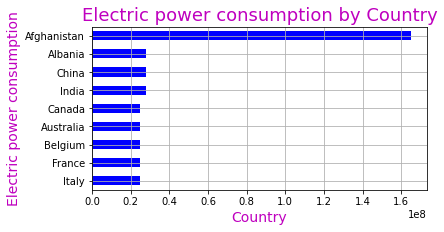

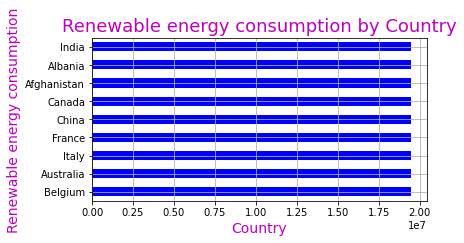

In [37]:
def comp_plot(erd,ftpt,ttl_plot):
    erd[ftpt].sort_values().plot(kind="barh",color="b",figsize=(6,3)) # ptol graph by sorting dataframe values
    plt.title("{}".format(ttl_plot),fontsize=18,color="m")     # title of graph  
    plt.xlabel("Country",fontsize=14,color="m")   # x-label of graph
    plt.ylabel("{}".format(ftpt),fontsize=14,color="m")    # y-label of graph
    plt.grid()      # grid of graph
    plt.show()      # show the graph

comp_plot(erdst,"Electric power consumption","Electric power consumption by Country")
comp_plot(erdst,"Renewable energy consumption","Renewable energy consumption by Country")

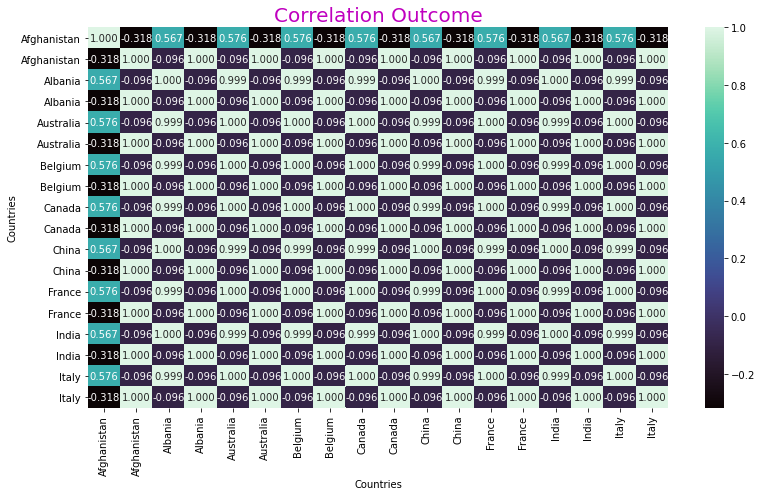

In [38]:
erd2=transform(erd1)
plt.figure(figsize=(13,7))
plt.title("Correlation Outcome",fontsize=20,color="m")
sns.heatmap(erd2.corr(),annot=True,fmt="0.3f",cmap="mako")    # show hearmap for correlation
plt.show()

In [39]:
i,j=0,1
m=0
print("=======================================================================")
print("                          Correlation")
print("    Electric power consumption and Renewable energy consumption")
print("=======================================================================")
for x in range(len(erd2.columns)):    # create loop over the number of countries taken
    try:
        cr=np.corrcoef(erd2.iloc[:,i],erd2.iloc[:,j])[0,1]    # calculate correlation using numpy
        print("=======================================================================")
        print("Country: {}".format(allsel[m]))     # show correlation by country
        print(cr)
        print("=======================================================================")
        i+=2
        j+=2
        m+=1
    except:
        pass

                          Correlation
    Electric power consumption and Renewable energy consumption
Country: Afghanistan
-0.3175739786899637
Country: Albania
-0.09640044154425778
Country: China
-0.09605664493831456
Country: Australia
-0.09605574263728836
Country: France
-0.09605353309143141
Country: Belgium
-0.09640245297814386
Country: India
-0.09605503716213841
Country: Italy
-0.09640057498807485
Country: Canada
-0.09605464615322407
